<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Дубликаты</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Выводы-и-базовые-рекомендации-по-работе-с-клиентами-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы и базовые рекомендации по работе с клиентами</a></span></li></ul></div>

## Введение

Данное исследование направлено на разработку стратегии по удержанию клиентов сети фитнес-центров «Культурист-датасаентист» на основе аналитических данных. Потребность в исследовании обусловлена наиболее распространённой проблемой фитнес-клубов и других сервисов — оттоком клиентов.

Как правило, клиенты чаще перестают пользоваться сервисом тихо. Индикаторы оттока зависят от специфики отрасли. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал.

Исследование построено на анкетах пользователей «Культуриста-датасаентиста».

## Изучение данных из файла

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# чтение файла с данными и сохранение в gym_churn
gym_churn = pd.read_csv(r'11_gym_churn\gym_churn.csv')

Изучим таблицу `gym_churn`. Выведем первые 10 строк, а также общую информацию:

In [3]:
def information(data):
    display(data.head(10))  
    data.info()

In [4]:
information(gym_churn)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


В таблице 14 столбцов:
* `gender` - пол (тип данных - **int64**);
* `Near_Location` - проживание или работа в районе, где находится фитнес-центр (тип данных - **int64**);
* `Partner` - сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента) (тип данных - **int64**); 
* `Promo_friends` - факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента) (тип данных - **int64**);                         
* `Phone` - наличие контактного телефона (тип данных - **int64**);                              
* `Contract_period` - длительность текущего действующего абонемента (месяц, 6 месяцев, год) (тип данных - **int64**);   
* `Group_visits` - факт посещения групповых занятий (тип данных - **int64**);                         
* `Age` - возраст (тип данных - **int64**);                                  
* `Avg_additional_charges_total` - суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон (тип данных - **float64**);         
* `Month_to_end_contract` - срок до окончания текущего действующего абонемента (в месяцах) (тип данных - **float64**);     
* `Lifetime` -  время с момента первого обращения в фитнес-центр (в месяцах) (тип данных - **int64**);                 
* `Avg_class_frequency_total` - средняя частота посещений в неделю за все время с начала действия абонемента (тип данных - **float64**);           
* `Avg_class_frequency_current_month` - средняя частота посещений в неделю за предыдущий месяц(тип данных - **float64**);   
* `Churn` - факт оттока в текущем месяце (тип данных - **int64**).

Сразу бросается в глаза нарушение стиля в заголовках: строчные буквы сочетаются с прописными.

Количество значений в столбцах одинаковое, значит в данных нет пропущенных значений.

Не понятно, почему столбец `Month_to_end_contract` имеет тип данных **float64**. Проверим, какие значения в нем содержатся, а после примем решение о смене типа данных на **int64**.

## Подготовка данных

### Стиль заголовков

Сделаем все симовлы в заголовках таблицы `gym_churn` строчными:

In [5]:
gym_churn.columns = [x.lower() for x in gym_churn.columns.values]

# проверим результат
gym_churn.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Замена отработала корректно.

### Изменение типов данных

Ранее было замечено, что поле `month_to_end_contract` имеет тип данных **float64**. Посмотрим, какие данные в нем содержатся:

In [6]:
gym_churn['month_to_end_contract'].unique()

array([ 5., 12.,  1.,  6.,  3., 10., 11.,  9.,  4.,  7.,  8.,  2.])

Все значения целочисленные, имеет смысл изменить тип данных на **int64**:

In [7]:
gym_churn['month_to_end_contract'] = gym_churn['month_to_end_contract'].astype(int)

# проверим
print('Тип данных столбца month_to_end_contract:', gym_churn['month_to_end_contract'].dtypes)

Тип данных столбца month_to_end_contract: int32


Тип данных успешно изменен.

### Дубликаты

Проверим, есть ли в таблице `gym_churn` строки, полностью дублирующие друг друга:

In [8]:
gym_churn[gym_churn.duplicated(keep = False)].sort_values(by = list(gym_churn.columns))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn


Полностью дублирующиеся строки отсутствуют.

## Исследовательский анализ данных (EDA)

Посмотрим отсутствующие признаки, а также изучим средние значения и стандартные отклонения:

In [9]:
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


**Выводы, которые можно сделать, гладя на таблицу выше:**
* Распределение клиентов по половой принадлежности примерно одинаковое;
* Большинство клиентов (85%) проживает или работает в районе, где находится фитнес-центр;
* Около оловины всех клиентов являются сотрудниками компании-партнера клуба;
* 30% клиентов пришли в рамках акции "приведи друга";
* Известны контактные номера 90% клиентов;
* Средняя длительность действующего абонемента - 4,6 месяцев;
* 41% клиентов посещают групповые занятия;
* Средний возраст клиентов - 29 лет;
* Средние дополнительные расходы на клиента - 146 рублей;
* Средний срок до окончания договора - 4,3 месяца;
* Среднее время с момента первого обращения в фитнес-центр - 3,7 месяцев;
* Средняя частота посещений за все время - 1,87 раз в неделю;
* Средняя частота посещений за последний месяц - 1,76 раз в неделю;
* **Доля оттока - 27%.**

Посмотрим на средние значения признаков в двух группах - тех, кто ушел в отток и тех, кто остался:

In [10]:
print('Ушли в отток:')
display(gym_churn.query('churn==1').describe().T)
print('Остались:')
display(gym_churn.query('churn==0').describe().T)

Ушли в отток:


,count,mean,std,min,25%,50%,75%,max
gender,1061.0,0.510839,0.500118,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,1061.0,0.768143,0.422217,0.000000,1.000000,1.000000,1.000000,1.000000
partner,1061.0,0.355325,0.478837,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,1061.0,0.183789,0.387495,0.000000,0.000000,0.000000,0.000000,1.000000
phone,1061.0,0.902922,0.296204,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,1061.0,1.728558,2.132371,1.000000,1.000000,1.000000,1.000000,12.000000
group_visits,1061.0,0.268615,0.443448,0.000000,0.000000,0.000000,1.000000,1.000000
age,1061.0,26.989632,2.895163,18.000000,25.000000,27.000000,29.000000,38.000000
avg_additional_charges_total,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.535220
month_to_end_contract,1061.0,1.662582,1.964593,1.000000,1.000000,1.000000,1.000000,12.000000


Остались:


,count,mean,std,min,25%,50%,75%,max
gender,2939.0,0.510037,0.499984,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,2939.0,0.873086,0.332933,0.000000,1.000000,1.000000,1.000000,1.000000
partner,2939.0,0.534195,0.498914,0.000000,0.000000,1.000000,1.000000,1.000000
promo_friends,2939.0,0.353522,0.478144,0.000000,0.000000,0.000000,1.000000,1.000000
phone,2939.0,0.903709,0.295040,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,2939.0,5.747193,4.716942,1.000000,1.000000,6.000000,12.000000,12.000000
group_visits,2939.0,0.464103,0.498795,0.000000,0.000000,0.000000,1.000000,1.000000
age,2939.0,29.976523,3.009933,19.000000,28.000000,30.000000,32.000000,41.000000
avg_additional_charges_total,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.590740
month_to_end_contract,2939.0,5.283089,4.363522,1.000000,1.000000,6.000000,10.000000,12.000000


**Выводы, которые можно сделать, гладя на таблицу выше:**
* Распределение по полу не отличается;
* Те, кто проживает или работает в районе, где находится фитнес-центр, реже попадают в отток;
* Клиенты, являющиеся сотрудниками компании-партнера клуба, реже перестают посещать фитнес-клуб;
* Клиенты, которые пришли по акции "Приведи друга" в два раза реже уходят в отток;
* Наличие контактного номера никак не отличается в группах;
* У большей части клиентов в оттоке срок действия договора составляет 1 месяц в то время как у остальных - 5;
* Оставшиеся пользователи чаще посещают групповые занятия;
* Клиенты, попавшие в отток в основной своей массе моложе тех, кто остался;
* Есть небольшое различие в выручке от других услуг фитнес-центра;
* Оставшееся время до окончания срока действия договора больше у оставшихся клиентов;
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время;
* У оставшихся клиентов время с момента первого обращения в фитнес-центр в 4 раза больше;
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время;
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке.

Построим столбчатые гистограммы и распределения признаков для тех, кто ушел (отток) и тех, кто остался (не попали в отток):

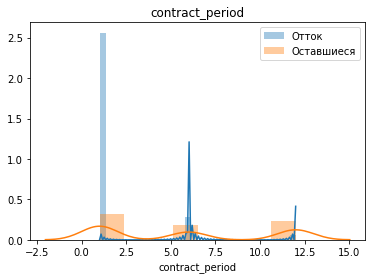

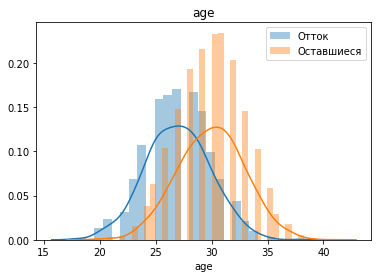

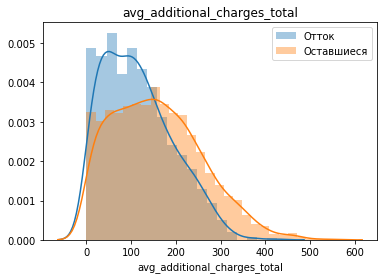

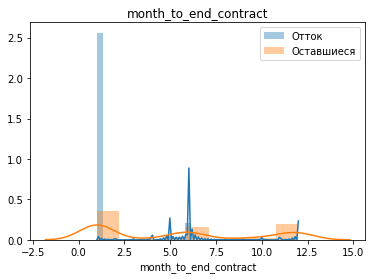

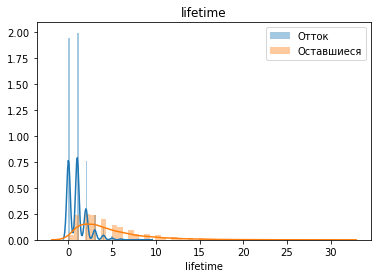

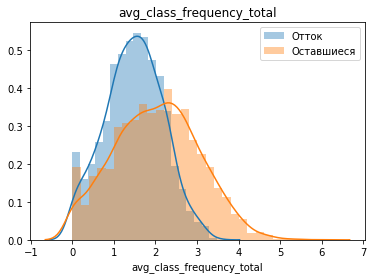

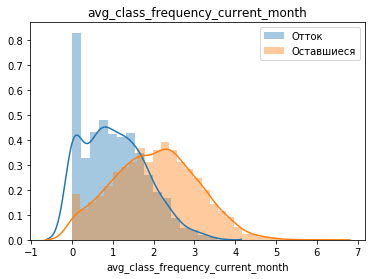

In [11]:
left = gym_churn[gym_churn['churn'] == 1]
stayed = gym_churn[gym_churn['churn'] == 0]
cuntinuous_columns = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract',
                     'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
for column in cuntinuous_columns:
    plt.title(column)
    sns.distplot(left[column])
    sns.distplot(stayed[column])
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

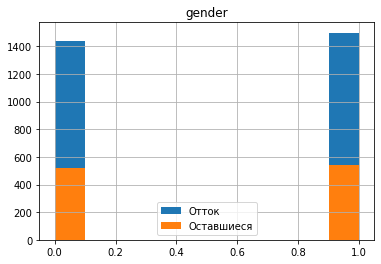

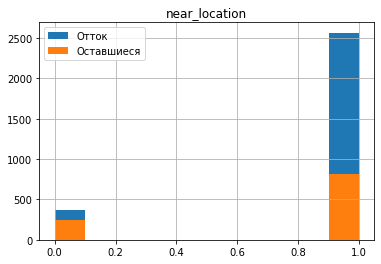

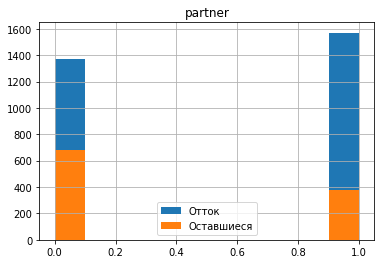

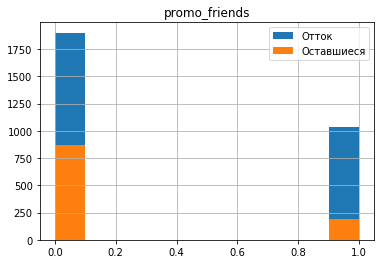

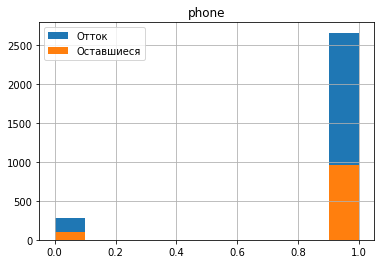

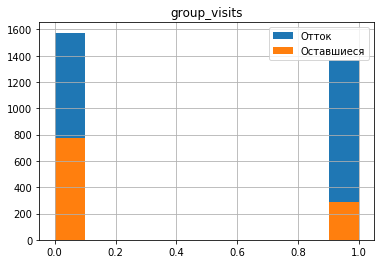

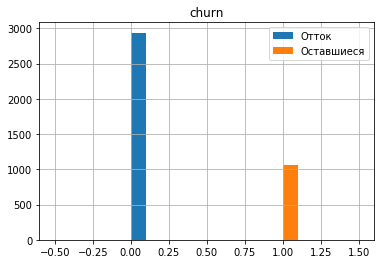

In [12]:
discrete_columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']
                     
for column in discrete_columns:
    gym_churn.groupby('churn')[column].hist()
    plt.title(column)
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

Что мы видим:
    
    * по полу, близости к фитнес-центру, наличию контактного телефона обе группы имеют схожее равномерное распределение;
    * есть различия в распределении групп между теми, кто является сотрудником компании-партнера клуба и не является. В группе лояльных клиентов число имеющих отношение к компании-партнера сотрудников явно больше, чем среди тех, кто уходит в отток. Различия в распределении групп по посещению групповых занятий такие же, как и в распределениях по принадлежности к компании-партнеру;
    * среди тех, кто остался, по промо-акции клиентов немного больше, но распределения схожи;
    * по среднему возрасту обе группы имеют нормальное распределение, но датасет лояльных клиентов немного смещён вправо, а датасет ушедших клиентов - влево;
    * распределение средней выручки от других услуг фитнес-центра для обоих датасетов смещено влево с большим смещением для ушедших людей (те, кто уходит, практически ничего не тратят на дополнительные услуги в фитнес-центре)

Отобразим матрицу корреляций:

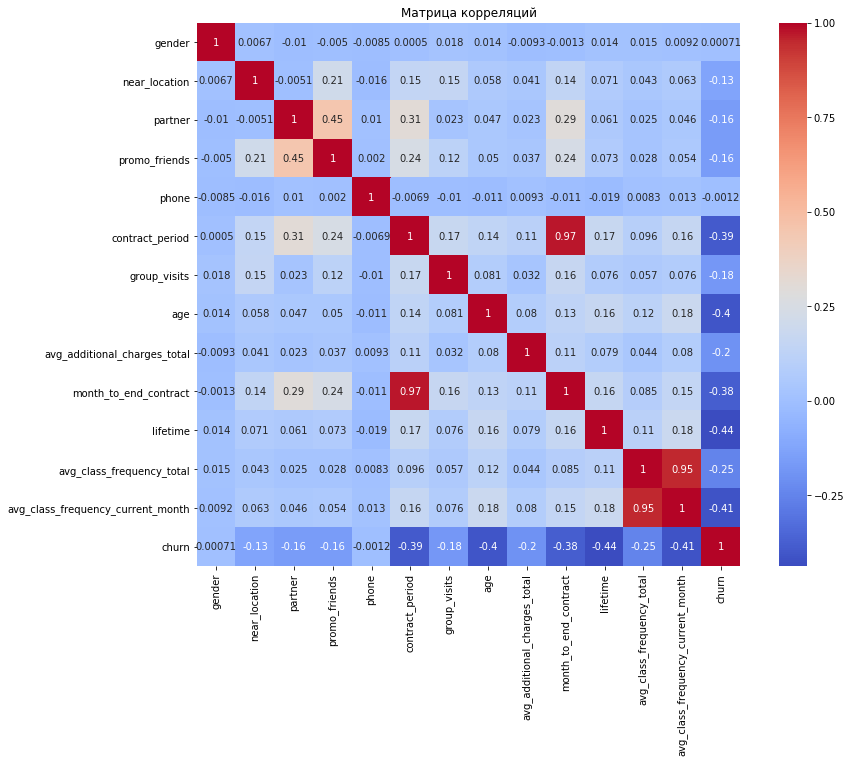

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(data = gym_churn.corr(), annot=True, square=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

На основе корреляции мы видим, что такие признаки как пол и наличие контактного телефона почти не влияют на конечный показатель оттока. Все остальные показатели имеют обратное влияние: слабое, либо чуть более сильное. Явно влияющих признаков, сильно связанных с результирующим показателем, предварительный анализ не выделил. Также мы имеем несколько признаков, связанных между собой линейной зависимостью: `contract_period` и `month_to_end_contract` (свидетельствует о том, что в выборке представлены клиенты, которые отобраны на определённом этапе покупки абонемента, скорее всего в начале его действия), а также `avg_class_frequency_total` и `avg_class_frequency_current_month` (скорее всего, клиенты посещают фитнес-центр примерно одинаковое число раз в неделю вне зависимости от того, сколько они пользуются услугами центра)/

## Построение модели прогнозирования оттока клиентов

Алгоритм, по коротому будем работать:
1. Разобьем данные на обучающую и валидационную выборки.
2. Обучим модель на train-выборке двумя способами:
* логистической регрессией;
* случайным лесом.
3. Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели.

In [14]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.4f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.4f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.4f}'.format(recall_score(y_true, y_pred)))

# разделим данные на признаки (матрица Х) и целевую переменную (у)
X = gym_churn.drop(columns=['churn'], axis=1)
y = gym_churn['churn']

# разделим модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(solver='liblinear')
# обучаем модель логистической регрессии
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
# выведем метрики
print_all_metrics(
    y_test,
    lr_predictions,
    title='Метрики для модели логистической регрессии:',
)


# зададим алгоритм для модели случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
# выведем метрики
print_all_metrics(
    y_test, 
    rf_predictions, 
    title='Метрики для модели случайного леса:'
)

Метрики для модели логистической регрессии:
	Accuracy: 0.9225
	Precision: 0.8542
	Recall: 0.8283
Метрики для модели случайного леса:
	Accuracy: 0.9150
	Precision: 0.8385
	Recall: 0.8131


Доля правильных прогнозов, полнота и точность чуть выше в модели логистической регрессии, следовательно, именно она показала себя лучше.

## Кластеризация клиентов

Проведем кластеризацию пользователей без столбца целевого значения:
1. Стандартизируем данные.
2. Построим матрицу расстояний функцией linkage() на стандартизированной матрице признаков и нарисуем дендограмму. Предположим, какое количество кластеров можем выделить.

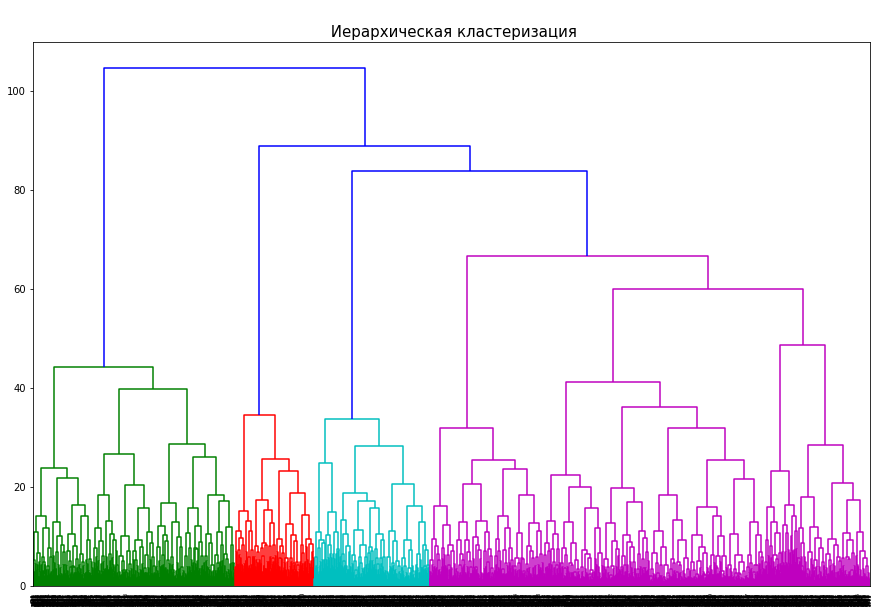

In [15]:
x_sc = scaler.fit_transform(X)
linked = linkage(x_sc, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()

Явно видны 4 кластера. Однако по условию задачи будем использовать 5. Обучим модель кластеризации на основе алгоритма K-Means и спрогнозируем кластеры клиентов:

In [16]:
# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=5, random_state=0) 
# применяем алгоритм к данным и формируем вектор кластеров 
labels = km.fit_predict(x_sc)
gym_churn['cluster_km'] = labels

Посмотрим на средние значения признаков для кластеров:

In [17]:
gym_churn.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


**Описание кластеров:**
1. **Кластер 0**:
    * Отток 3%;
    * Живут или работают недалеко от фитнес-центра;
    * Преобладают сотрудники компаний-партнеров;
    * Заключают договора на длительный срок - 10 месяцев;
    * Чаще всех посещают групповые занятия - 54%;
    * Чаще всех пришли по промо-акции.


2. **Кластер 1**:
    * Отток 27 %;
    * Живут или работают недалеко от фитнес-центра;
    * Нет мобильного номера;
    * Контракты в среднем на 4 месяца.


3. **Кластер 2**:
    * Отток 44%;
    * Живут или работают далеко от фитнес-центра;
    * Самый низкий % по промоакции - 7%;
    * Реже всех посещают групповые занятия.


4. **Кластер 3**:
    * Отток 51%;
    * Живут или работают недалеко от фитнес-центра;
    * Самый короткий срок заключения договора - 1,9 месяцев.


5. **Кластер 4**:
    * Отток 7%;
    * Живут или работают далеко от фитнес-центра;
    * Заключают контракты на непродолжительный срок ~ 2 месяца;
    * Самая старшая возрастная категория.

Построим распределения признаков для кластеров. Сперва разберемся с непрерывными переменными:

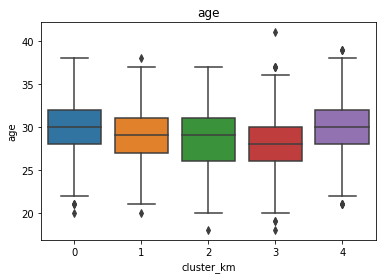

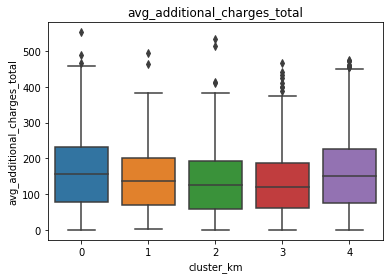

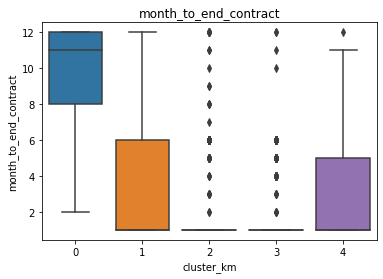

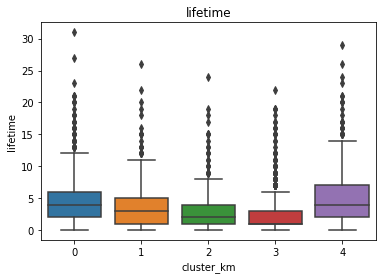

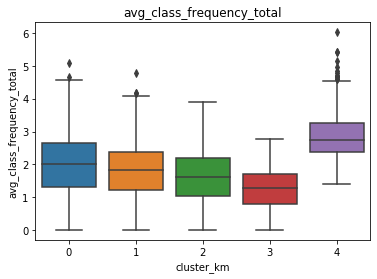

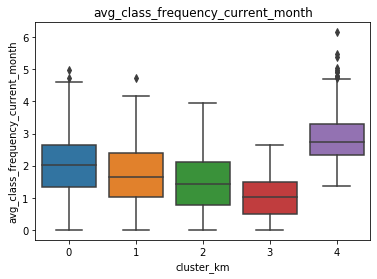

In [18]:
cuntinuous_columns = ['age', 'avg_additional_charges_total', 'month_to_end_contract',
                     'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

for column in cuntinuous_columns:
    plt.title(column)
    sns.boxplot(x='cluster_km', y = column, data=gym_churn)
    plt.show()
    

А для дискретных переменных построим обычные столбчатые диаграммы:

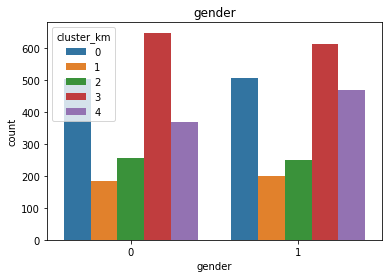

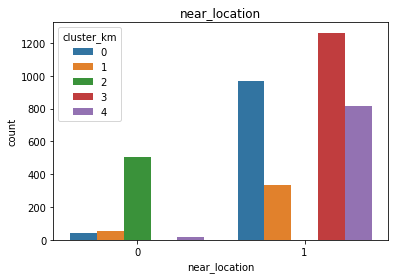

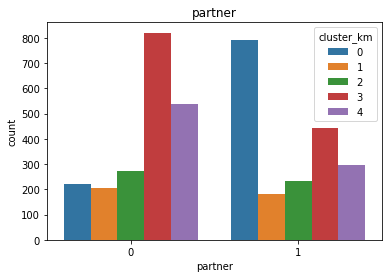

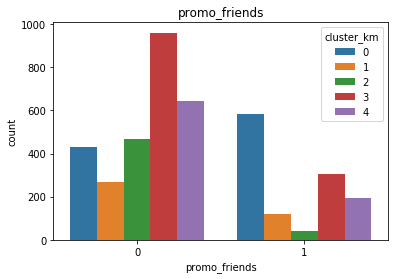

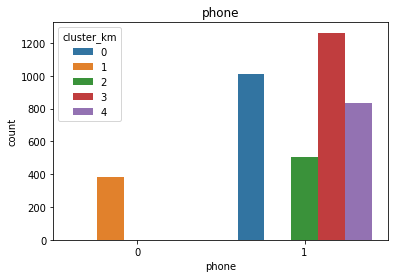

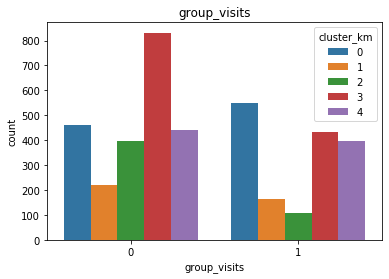

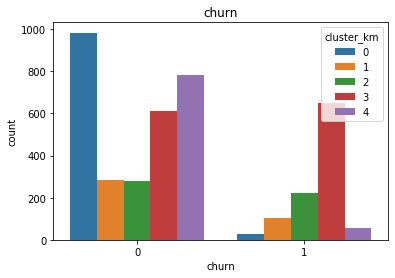

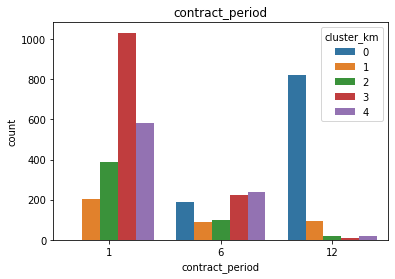

In [19]:
discrete_columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 
                    'churn', 'contract_period']
                     
for column in discrete_columns:
    sns.countplot(data=gym_churn, x=column, hue='cluster_km')
    plt.title(column)
    plt.show()

**Описание кластеров:**

1. **Кластер 0**:
    * приблизительно равное распределение мужчин и женщин;
    * клиенты проживают или работают около фитнес-центра;
    * большинство клиентов являются сотрудниками компании-партнера;
    * большая часть клиентов пришла по промо-акции;
    * наличие контактного телефона;
    * примерно одинаковое количество клиентов, которые посещают групповые занятия и обычные тренировки;
    * практически отсутствует отток;
    * абонементы на 6 и 12 месяцев со значительным преобладанием абонементов на 12 месяцев;
    * средний возраст 30 лет;
    * дополнительные траты одни из самых высоких;
    * в среднем 2 посещения в неделю.
    

2. **Кластер 1**:
    * приблизительно равное распределение мужчин и женщин;
    * клиенты проживают или работают около фитнес-центра;
    * примерно равное число посетителей от компании-партнера и обычных посетителей;
    * большинство клиентов пришло не по промо-акции;
    * **нет контактных данных**;
    * примерно одинаковое количество клиентов, которые посещают групповые занятия и обычные тренировки;
    * малая доля оттока;
    * абонементы на 1, 6 и 12 месяцев с преобладанием абонементов на 1 месяц;
    * средний возраст 28-29 лет;
    * средний уровень дополнительных трат;
    * в среднем около 2ч посещений в неделю.


3. **Кластер 2**:
    * приблизительно равное распределение мужчин и женщин;
    * клиенты проживают или работают далеко фитнес-центра;
    * примерно равное число посетителей от компании-партнера и обычных посетителей;
    * в основном клиенты пришли не по промо-акции;
    * есть контактные данные;
    * большинство клиентов не посещают групповые занятия;
    * доля оставщихся и тех, кто ушел, примерно одинакова;
    * абонементы на 1, 6 и 12 месяцев со значительным преобладанием абонементов на 1 месяц;
    * средний возраст 28-29 лет;
    * в среднем 1,8 посещений в неделю;
    * средний уровень дополнительных трат.


4. **Кластер 3**:
    * приблизительно равное распределение мужчин и женщин;
    * клиенты проживают или работают около фитнес-центра;
    * большинство клиентов не являются сотрудниками компании-партнера;
    * большинство клиентов пришло не по промо-акции;
    * есть контактные данные;
    * в основном клиенты предпочитают обычные занятия, а не групповые;
    * доля оставщихся и тех, кто ушел, примерно одинакова;
    * абонементы на 1, 6 и 12 месяцев со значительным преобладанием абонементов на 1 месяц;
    * самые молодые клиенты, средний возраст ~ 27 лет;
    * клиенты меньше всего совершают дополнительные траты;
    * в среднем меньше всего посещений в неделю ~ 1,5 раз.
    

5. **Кластер 4**:
    * распределение мужчин и женщин не равное;
    * клиенты проживают или работают около фитнес-центра;
    * большинство клиентов не являются сотрудниками компании-партнера;
    * большинство клиентов пришло не по промо-акции;
    * есть контактные данные;
    * примерно одинаковое количество клиентов, которые посещают групповые занятия и обычные тренировки;
    * самыке надежные клиенты - наименьший процент оттока;
    * абонементы на 1, 6 и 12 месяцев со значительным преобладанием абонементов на 1 месяц;
    * самая старшая возрастная категория;
    * совершают дополнительные траты на равне с клиентами из Кластера 0;
    * больше всего посещений в неделю - 3 раза.
    
    
Третий кластер больше всего склонен к оттоку: доля составляет около 51%. Второй кластер арактеризуется долей оттока в 44%, а первый - около 26%. Нулевой и четвертый кластеры (доля оттока 2% и 6% соответственно) являются самыми надежными.

## Выводы и базовые рекомендации по работе с клиентами

Что было выяснено в ходе исследования:
1. Около трети клиентов уходят в отток.
2. Мужчины и женщины в равной степени пользуются услугами фитнес-центра.
3. Фитнес-центр посещает больше клиентов, которые живут поблизости, они же более лояльны нежели те, кто живет далеко.
4. В фитнес-центре в равной степени представлены клиенты, являющиеся сотрудниками компаний-партнеров, и люди, не имеющие к ним отношение. Но ушедшие в отток клиенты в большей степени не являются сотрудниками компаний-партнеров.
5. Практически все клиенты фитнес-центра оставляют контакты для связи - вне зависимости от того, останутся они в фитнес-центре, или уйдут в отток.
6. Клиенты предпочитают покупать абонемент на короткий срок, но купившие более длительный абонемент с большей вероятностью не уйдут в отток, чем те, у кого он действует короткий срок.
7. Большинство клиентов не интересуется групповыми занятиями.
8. Самые надежные кластеры - нулевой и четвертый (доля оттока 2% и 6% соответственно).

Что можно порекомендовать при работе с клиентами:
1. Привлекать потенциальных клиентов из близлежащих районов.
2. Отменить промо-акцию, а также скидки для клиентов компании-партнера, поскольку они никак не способствуют "удержанию" клиентов.
3. Реклама абонементов с более длительным сроком действия, поскольку такие клиенты меньше всего уходят в отток.
4. Поскольку категория с длительными абонементами имеет склонность пользоваться доп услугами, для них возможно введение специальных скидок и акций по доп услугам.